In [1]:
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

In [2]:
group_2 = [
    'vk_2_eg', 'stahl_folder', 'r707lv_f4032', 
    'r707lv_f4034', 'r707lv_vari_air', 'og_3'
]

### Kernel Composition

**Note**: Normalization of time range effects the period length hyperparams.
 - Solution? Normalize the range of period constraints

In [17]:
## Locally Periodic Kernel ##

period_constraint_short = gpytorch.constraints.Interval(0.20, 0.22) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short


"""
period_constraint_long = gpytorch.constraints.Interval(0.176, 0.230) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long
"""

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)
local_variation_lengthscale = gpytorch.priors.GammaPrior(1, 0.05)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha
local_variation.lengthscale = local_variation_lengthscale

local_variation_2 = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel(
    )
)


#covar_module = locally_short_periodic + locally_long_periodic + local_variation + local_variation_2
covar_module = locally_short_periodic + local_variation + local_variation_2

In [18]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('r707lv_f4032_15T', 15, True)

Iter 1 , Loss = 1.2193421616006566 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.2067102801662055 , Noise = 0.6444966793060303
Iter 3 , Loss = 1.193124164819645 , Noise = 0.5986154675483704
Iter 4 , Loss = 1.1791080306042037 , Noise = 0.5558624863624573
Iter 5 , Loss = 1.1655994974760504 , Noise = 0.5166177153587341
Iter 6 , Loss = 1.1535930430615495 , Noise = 0.481536328792572
Iter 7 , Loss = 1.143471334736674 , Noise = 0.45162877440452576
Iter 8 , Loss = 1.1345802908007345 , Noise = 0.4279227554798126
Iter 9 , Loss = 1.1259743579041668 , Noise = 0.41065579652786255
Iter 10 , Loss = 1.1174316637510187 , Noise = 0.39892837405204773
Iter 11 , Loss = 1.1099141362051534 , Noise = 0.3912573456764221
Iter 12 , Loss = 1.1048989556348061 , Noise = 0.3862742781639099
Iter 13 , Loss = 1.1031083977983895 , Noise = 0.3830326497554779
Iter 14 , Loss = 1.1039241058839186 , Noise = 0.3809729516506195
Iter 15 , Loss = 1.1059582690297418 , Noise = 0.37976670265197754
Iter 16 , Loss = 1.10796046844624

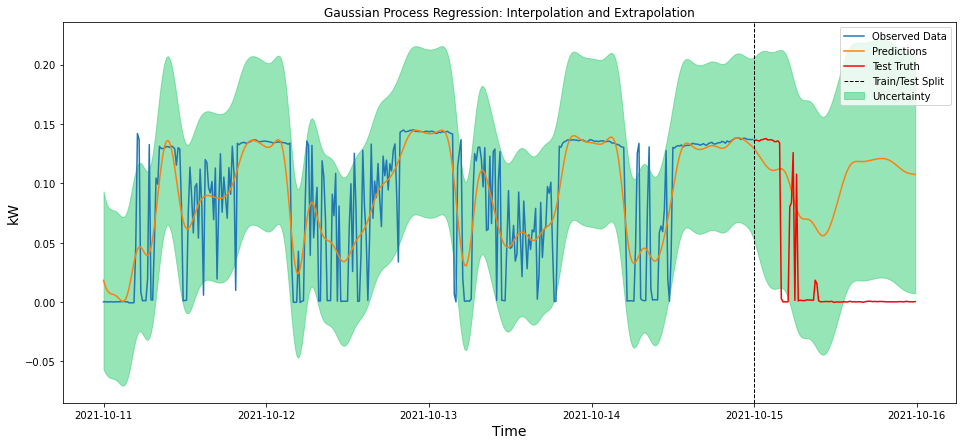

Paper Disposal Machine (Entsorgung)
-----------------------------------
Expected next day energy consumption    =  tensor(4.8523, dtype=torch.float64) kWh
Upper bound next day energy consumption =  tensor(9.6072, dtype=torch.float64) kWh
Lower bound next day energy consumption =  tensor(0.0975, dtype=torch.float64) kWh


In [19]:
model, likelihood, mse, mape, perf_dev_upper = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    machine='r707lv_f4032_30T',
    update_score=False
)   

In [7]:
mse, mape

(2.796447720094227e-05, 0.05379464921814899)

### 10T

In [9]:
## Locally Periodic Kernel ##
period_constraint_short = gpytorch.constraints.Interval(0.083, 0.126) ## short term

seasonal_periodic_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_short
        )
    )

seasonal_rbf_short = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_short_periodic = seasonal_periodic_short * seasonal_rbf_short

period_constraint_long = gpytorch.constraints.Interval(0.167, 0.209) ## long term

seasonal_periodic_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.PeriodicKernel(
        period_length_constraint=period_constraint_long
        )
    )

seasonal_rbf_long = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RBFKernel()
)

locally_long_periodic = seasonal_periodic_long * seasonal_rbf_long

## Local Variations ##
local_variation_alpha = gpytorch.priors.GammaPrior(1, 0.5)

local_variation = gpytorch.kernels.ScaleKernel(
    gpytorch.kernels.RQKernel()
    )
    
local_variation.alpha = local_variation_alpha


covar_module = locally_short_periodic + locally_long_periodic + local_variation


In [10]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess('vk_2_eg_30T', 30, True)

Iter 1 , Loss = 1.1167325933146015 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.0860422000868042 , Noise = 0.6444966793060303
Iter 3 , Loss = 1.0578813669127018 , Noise = 0.5982540845870972
Iter 4 , Loss = 1.034519570589345 , Noise = 0.5545238852500916
Iter 5 , Loss = 1.016989282242349 , Noise = 0.5133202075958252
Iter 6 , Loss = 1.0029779132467664 , Noise = 0.4746778905391693
Iter 7 , Loss = 0.9891673703587464 , Noise = 0.4386254549026489
Iter 8 , Loss = 0.974480447016517 , Noise = 0.4051511883735657
Iter 9 , Loss = 0.9593008503451905 , Noise = 0.37420448660850525
Iter 10 , Loss = 0.9444954295627985 , Noise = 0.3457084596157074
Iter 11 , Loss = 0.9311038585661806 , Noise = 0.3195689618587494
Iter 12 , Loss = 0.9202051139326329 , Noise = 0.29568687081336975
Iter 13 , Loss = 0.9120358580878859 , Noise = 0.27397993206977844
Iter 14 , Loss = 0.9053210593234681 , Noise = 0.25439631938934326
Iter 15 , Loss = 0.8990413582122293 , Noise = 0.2368994802236557
Iter 16 , Loss = 0.89371013735091

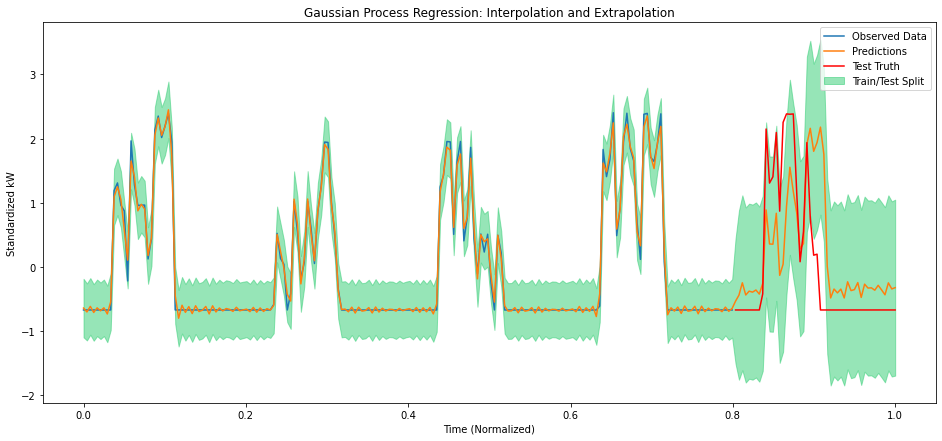

Points outside of confidence region: [2.25321257 2.38491068]


In [11]:
model, likelihood, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    time_agg='30T',
    machine='vk_2_eg',
    update_score=False
)   

In [12]:
mse, mape

(0.8419735761654904, 1.0628913651431569)